### **HOUSE PRICE PREDICTION**

### *`IMPORT LIBRARIES AND DATASETS`*

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRFRegressor 
from sklearn.feature_selection import RFE 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV 

In [3]:
df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [4]:
df1=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [5]:
ID=df1['Id']

**DATA** **ANALYSIS** 

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
df.shape

(1460, 81)

In [9]:
df1.shape

(1459, 80)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [12]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


HANDLING NULL VALUES

In [14]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [15]:
pd.set_option('display.max_rows', df.shape[0])
pd.DataFrame(df.isnull().sum().sort_values(ascending = False))

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [16]:
pd.set_option('display.max_rows', df1.shape[0])
pd.DataFrame(df1.isnull().sum().sort_values(ascending = False))

,0
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageYrBlt,78
GarageQual,78
GarageFinish,78
GarageCond,78


In [17]:
null = df.isnull().sum() / df.shape[0] *100   
col_to_drop = null[null > 50 ].keys()  
col_to_drop

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

### **DROP THE UNWANTED COLUMNS**

In [18]:
df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'],inplace=True)

In [19]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [20]:
len(df.columns[df.isnull().any()])

15

**REPLACE THE NULL VALUES**

In [21]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea']  = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())     
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['MasVnrType']   = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])  
df['BsmtQual']     = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])  
df['BsmtCond']     = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])  
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])  
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])  
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])  
df['Electrical']   = df['Electrical'].fillna(df['Electrical'].mode()[0])  
df['FireplaceQu']  = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])  
df['GarageType']   = df['GarageType'].fillna(df['GarageType'].mode()[0])  
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])  
df['GarageQual']   = df['GarageQual'].fillna(df['GarageQual'].mode()[0])  
df['GarageCond']   = df['GarageCond'].fillna(df['GarageCond'].mode()[0]) 

In [22]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [23]:
df.isnull().values.sum()

0

VISUALISATION OF DATASET USING PLOTTING

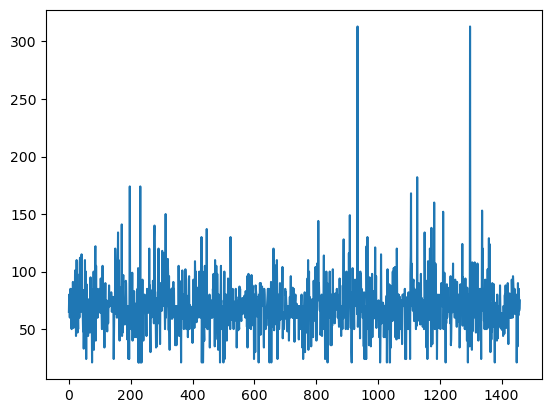

In [24]:
plt.plot(df["LotFrontage"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


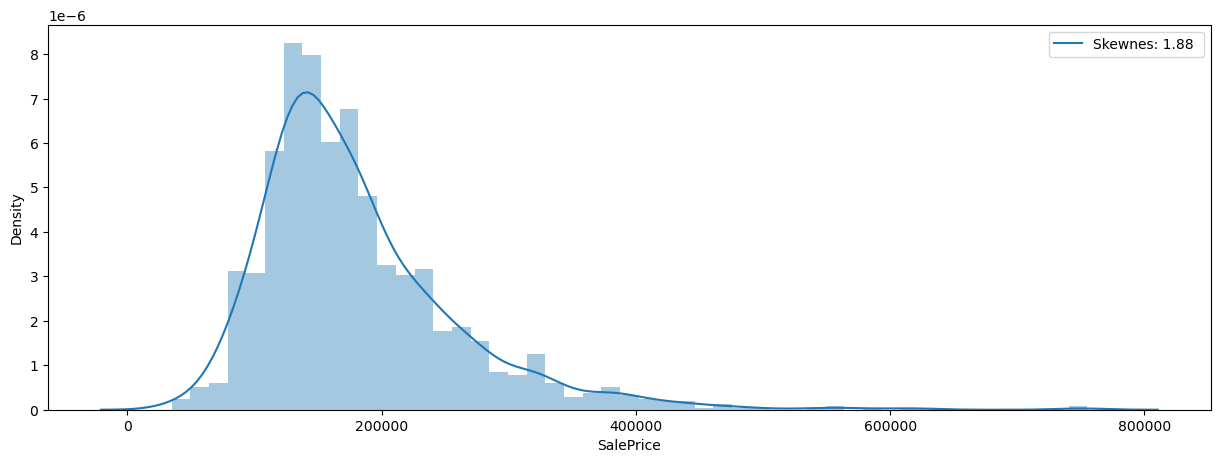

In [25]:
plt.figure(figsize=(15,5))
bar = sns.distplot(df['SalePrice'])
bar.legend(['Skewnes: {:.2f} '.format(df['SalePrice'].skew())])
plt.show()

In [26]:
corr =df.corr()

high_corr_features = corr.index[abs(corr['SalePrice']) > 0.5] 
print(f'Highly Corrolated Features:\n', high_corr_features, '\n') 
print(f'No. of Highly Corrolated Features:', len(high_corr_features))

Highly Corrolated Features:
 Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object') 

No. of Highly Corrolated Features: 11


Text(120.72222222222221, 0.5, 'Features')

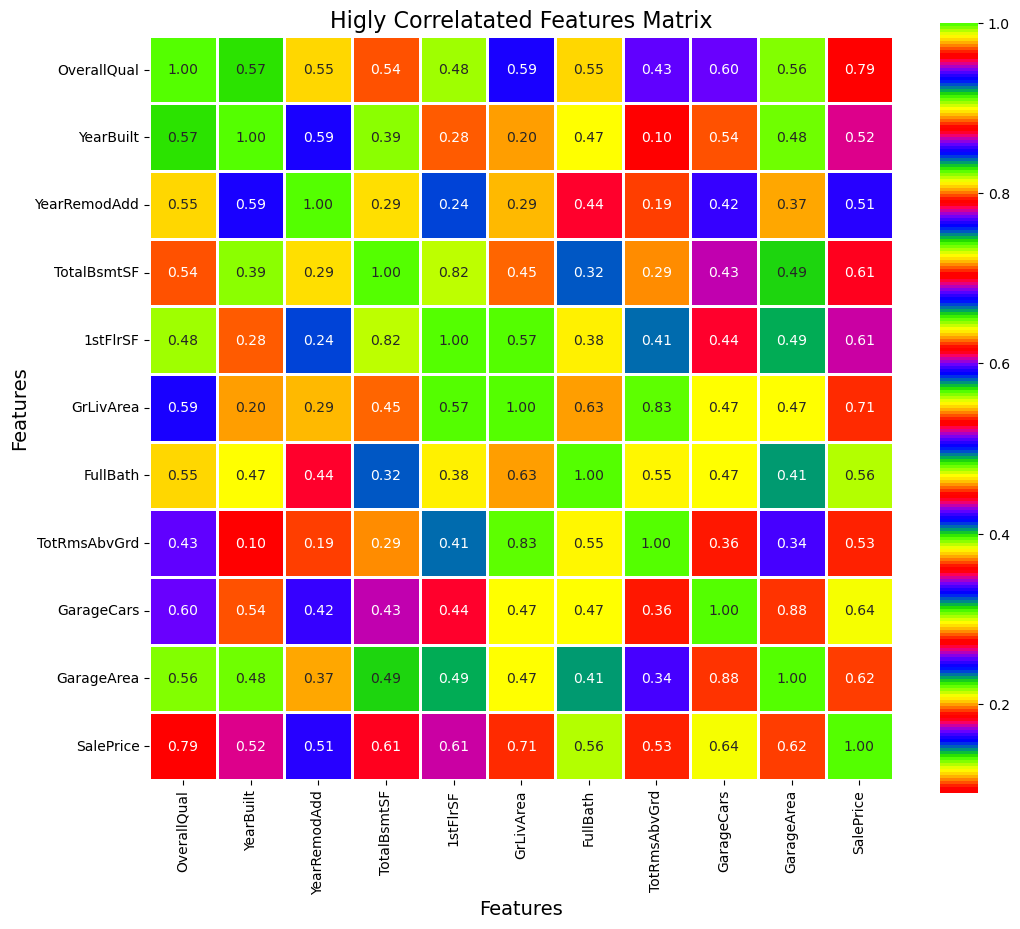

In [27]:
plt.figure(figsize=(12,10))   
sns.heatmap(df[high_corr_features].corr(), annot=True, cmap='prism', cbar=True, fmt='.2f', square=True, linewidths=2)

plt.title('Higly Correlatated Features Matrix', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

**FEATURE ENGINEERING**

In [28]:
train = pd.get_dummies(df, drop_first=True)  
test = pd.get_dummies(df1, drop_first=True)  
train.shape   
test.shape

(1459, 228)

In [29]:
len(train.select_dtypes(include='object').columns)

0

In [30]:
len(test.select_dtypes(include='object').columns)

0

**SPLITTING OF THE DATASET**

In [31]:
corr = train.corr()

high_corr_features = corr.index[abs(corr['SalePrice']) > 0.52] 
print(f'Highly Corrolated Features:\n', high_corr_features, '\n') 
print(f'No. of Highly Corrolated Features:', len(high_corr_features))

Highly Corrolated Features:
 Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice',
       'ExterQual_TA'],
      dtype='object') 

No. of Highly Corrolated Features: 11


In [32]:
X = train[high_corr_features.drop('SalePrice')] 

In [33]:
X

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,ExterQual_TA
0,7,2003,856,856,1710,2,8,2,548,0
1,6,1976,1262,1262,1262,2,6,2,460,1
2,7,2001,920,920,1786,2,6,2,608,0
3,7,1915,756,961,1717,1,7,3,642,1
4,8,2000,1145,1145,2198,2,9,3,836,0
...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,953,953,1647,2,7,2,460,1
1456,6,1978,1542,2073,2073,2,7,2,500,1
1457,7,1941,1152,1188,2340,2,9,1,252,0
1458,5,1950,1078,1078,1078,1,5,1,240,1


In [34]:
y = train[['SalePrice']]  

In [35]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [36]:
test = test[high_corr_features.drop('SalePrice')] 

In [37]:
test

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,ExterQual_TA
0,5,1961,882.0,896,896,1,5,1.0,730.0,1
1,6,1958,1329.0,1329,1329,1,6,1.0,312.0,1
2,5,1997,928.0,928,1629,2,6,2.0,482.0,1
3,6,1998,926.0,926,1604,2,7,2.0,470.0,1
4,8,1992,1280.0,1280,1280,2,5,2.0,506.0,0
5,6,1993,763.0,763,1655,2,7,2.0,440.0,1
6,6,1992,1168.0,1187,1187,2,6,2.0,420.0,1
7,6,1998,789.0,789,1465,2,7,2.0,393.0,1
8,7,1990,1300.0,1341,1341,1,5,2.0,506.0,1
9,4,1970,882.0,882,882,1,4,2.0,525.0,1


In [38]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
test.fillna(test.mode().iloc[0], inplace=True) 

In [40]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
test = ss.transform(test)

**MODEL BUILDING**

*RANDOM FOREST*

In [41]:
clf_rfr = RandomForestRegressor(random_state=0)   #Creating the Random Forest Regressor Model
clf_rfr.fit(X_train, y_train)                     #Training the Model with X_train & y_train
pred = clf_rfr.predict(X_val)                    #Predicting the X_test 

#Testing the model accuracy with different paramtes
r2   = r2_score(y_val, pred)             # Getting the R-squared (R²)
mae  = mean_absolute_error(y_val, pred)  # Getting the Mean Absolute Error
mse  = mean_squared_error(y_val, pred)   # Getting the Mean Squared Error
rmse = np.sqrt(mse)                       # Getting the Root Mean Squared Error


#Defining a DataFrame 
rfr_results = pd.DataFrame([['Random Forest Regressor', r2, mae, mse, rmse]],
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])

result =rfr_results.append(rfr_results, ignore_index=True)
#Printing the Model Results with different Metrics
result

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Random Forest Regressor,0.851189,19459.953152,1.027663e+09,32057.183087
1,Random Forest Regressor,0.851189,19459.953152,1.027663e+09,32057.183087


**PREDICTING THE MODEL AND SUBMISSION**

In [42]:
new_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')  
output = pd.DataFrame({'Id': ID})
output.to_csv('submission_house_price.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
